# Hyperparameter Tuning

Hyperparameter Tuning form Deep Learning by Andrew Ng 
[66](https://www.youtube.com/watch?v=WrICwRrvuIc&list=PLBAGcD3siRDguyYYzhVwZ3tLvOyyG5k6K&index=66)
[67](https://www.youtube.com/watch?v=VUbrW8OK3uo&index=67&list=PLBAGcD3siRDguyYYzhVwZ3tLvOyyG5k6K)
[68](https://www.youtube.com/watch?v=wP-DzAtE71g&index=68&list=PLBAGcD3siRDguyYYzhVwZ3tLvOyyG5k6K)

In [5]:
import numpy as np
import sys
print(sys.executable, sys.path)
import tensorflow as tf
import matplotlib.pyplot as plt

from data_loading import load_fashion_mnist
from model_CNN import CNN_fashion_mnist_hyperparameter_search

%matplotlib inline


" Data Loading "
data = load_fashion_mnist()
x_train, x_test, y_train, y_test, y_train_cls, y_test_cls, class_names = data


" Hyperparameter Tuning "
lr_list = []
fc_list = []
test_accuracy_list = []

lr_op = 0.02
fc_op = 900
global_max_test_accuracy = 0.1

for k in range(10):
    
    lr_list_temp = lr_op * 10 ** np.random.uniform(-2.0/((k+1)**2), 2.0/((k+1)**2), 10)
    fc_list_temp = fc_op + np.random.randint(-(10-k)*50, (10-k)*50, 10)
    
    for i in range(10):
        
        tf.reset_default_graph()
        g = tf.Graph() 
        with g.as_default():
            with tf.Session(graph=g) as sess:
                with tf.variable_scope("cnn_fashion_mnist_{}".format(str(10*k+i))):
                    classifier = CNN_fashion_mnist_hyperparameter_search(sess, 
                                                                         learning_rate=lr_list_temp[i],
                                                                         fc_size=fc_list_temp[i])
                    classifier.data_loading(data)
                    classifier.graph_construction()
                    tf.global_variables_initializer().run(session=sess)
                    classifier.train(is_print=False)
                    classifier.save(sess=sess, save_path='graphs/cnn_fashion_mnist_{}'.format(str(10*k+i)), is_print=False)
                    test_accuracy = classifier.print_test_accuracy(is_print=False)
                    
                    lr_list.append(lr_list_temp[i])
                    fc_list.append(fc_list_temp[i])
                    test_accuracy_list.append(test_accuracy)
                    
                    if i == 0:
                        local_max_idx = i
                        local_max_test_accuracy = test_accuracy     
                    if test_accuracy > local_max_test_accuracy:
                        local_max_idx = i
                        local_max_test_accuracy = test_accuracy
                    if test_accuracy > global_max_test_accuracy:
                        global_max_test_accuracy = test_accuracy
                        lr_op = lr_list_temp[local_max_idx]
                        fc_op = fc_list_temp[local_max_idx]
                            
                        print('Graph Number  : ', 10*k+i)
                        print('Learning Rate : ', lr_list_temp[i])
                        print('FC Number     : ', fc_list_temp[i])
                        print('Test Accuracy : ', test_accuracy)
                        print()
                            
test_accuracy_list = np.array(test_accuracy_list)
max_index = np.argmax(test_accuracy_list)

print("*******************************************")
print('Final Graph Number  : ', max_index)
print('Final Learning Rate : ', lr_list[max_index])
print('Final FC Number     : ', fc_list[max_index])
print('Final Test Accuracy : ', test_accuracy_list[max_index])
print("*******************************************")

fig = plt.figure()
ax = plt.gca()
ax.scatter(lr_list, fc_list, s=100*np.array(test_accuracy_list), c=100*np.array(test_accuracy_list), alpha=0.5)
ax.set_xscale('log')
ax.set_xlim([0.0001, 10])
ax.set_xlabel('learning rate')
ax.set_ylabel('fc size')
plt.show()

fig = plt.figure()
plt.plot(100*np.array(test_accuracy_list))
plt.xlabel('graph number')
plt.ylabel('test accuracy')
plt.show()


" Tuned Model Restoration "
tf.reset_default_graph()
g = tf.Graph() 
with g.as_default():
    with tf.Session(graph=g) as sess:
        saver = tf.train.import_meta_graph('graphs/cnn_fashion_mnist_{}'.format(str(max_index)) + '.meta',
                                           clear_devices=True)
        saver.restore(sess=sess, save_path='graphs/cnn_fashion_mnist_{}'.format(str(max_index)))

        x         = sess.graph.get_tensor_by_name('cnn_fashion_mnist_{}'.format(str(max_index)) +'/'+ 'x:0')
        keep_prob = sess.graph.get_tensor_by_name('cnn_fashion_mnist_{}'.format(str(max_index)) +'/'+ 'keep_prob:0')
        is_train  = sess.graph.get_tensor_by_name('cnn_fashion_mnist_{}'.format(str(max_index)) +'/'+ 'is_train:0')
        y_pred    = sess.graph.get_tensor_by_name('cnn_fashion_mnist_{}'.format(str(max_index)) +'/'+ 'y_pred:0')
        
        feed_dict = {x: x_test, keep_prob: 1.0, is_train: False}
        probs = sess.run(y_pred, feed_dict=feed_dict)
        cls_pred = np.argmax(probs, axis=1)
        print("Accuracy on test-set: {:%}".format((cls_pred == y_test_cls).sum() / len(y_test_cls)))

/Users/danielhan/anaconda3/envs/mynewenv/bin/python ['', '/Users/danielhan/anaconda3/envs/mynewenv/lib/python36.zip', '/Users/danielhan/anaconda3/envs/mynewenv/lib/python3.6', '/Users/danielhan/anaconda3/envs/mynewenv/lib/python3.6/lib-dynload', '/Users/danielhan/anaconda3/envs/mynewenv/lib/python3.6/site-packages', '/Users/danielhan/anaconda3/envs/mynewenv/lib/python3.6/site-packages/IPython/extensions', '/Users/danielhan/.ipython']
Graph Number  :  0
Learning Rate :  0.002907868547094031
FC Number     :  577
Test Accuracy :  0.8987



KeyboardInterrupt: 

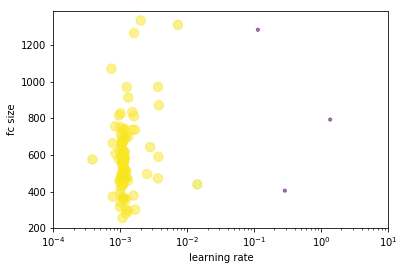

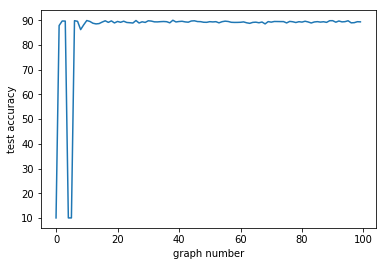

In [41]:
lr_list = [1.356758973926548, 0.00038223081941407295, 0.0015988830003858152, 0.0013027584733828143, 0.28518258763476456, 0.11306520715540332, 0.0015045871266328773, 0.0020147914418210413, 0.014071335349912242, 0.007213745647375444, 0.0012047054560753241, 0.0011423787471519168, 0.003751660325823518, 0.003644603538620112, 0.0027830712192118906, 0.0036435629949047553, 0.0010087351040689715, 0.0016485846677221948, 0.0025014319290680366, 0.003693579932980143, 0.0008447177473646829, 0.0007685350316084989, 0.0007316903600162763, 0.000987829178213279, 0.0008394687753621476, 0.0012449019424138382, 0.0016685632626670566, 0.001132200744010479, 0.0013144330677903066, 0.0007670630586493807, 0.0010845466361662627, 0.0014883191659676722, 0.001079883231160134, 0.0012419451032611838, 0.0009540670805028198, 0.0015898028663957234, 0.0010908898424281646, 0.0009502969706977384, 0.0010991449523048368, 0.0015741487630427072, 0.00130798326101584, 0.000966614984416173, 0.0010729808507452432, 0.001310284692738252, 0.0010864880290187924, 0.0009909041063364547, 0.0010084137132501843, 0.001087178719144572, 0.0012065830340801987, 0.000994812674878337, 0.0009812586226815147, 0.0011683683212173547, 0.0012151853290298443, 0.0012277923575033478, 0.001214209078450662, 0.0010665320693002335, 0.001182761986509669, 0.0010917016092509924, 0.0009702271750335613, 0.0011409367446231534, 0.001015568136762077, 0.0010786167149631168, 0.0011754067793997315, 0.001139016025194354, 0.0010104187773854545, 0.0011597376554713223, 0.0010375320616265503, 0.0010922714266676235, 0.0011663407133838196, 0.001066679001300662, 0.0011794622423420417, 0.0010369157166564803, 0.001072548182462138, 0.0010352180662965237, 0.0011108792614889942, 0.0010230590104110438, 0.0010780917199593105, 0.0011198746154446008, 0.0010681957955255988, 0.0011664386971175476, 0.0011571580233665723, 0.00109812049756681, 0.0010531384551918496, 0.0011410962428551428, 0.0010438853079804034, 0.0011113845347220886, 0.0011261113393574058, 0.0010728968600661876, 0.0010829457706046247, 0.001052265726017857, 0.0011049872109192606, 0.001106948034414764, 0.0011202463903452718, 0.00113367954899668, 0.0010603857490566534, 0.0011483751375093848, 0.0011173882577890544, 0.001130562304396816, 0.00109621000988208, 0.0011204325659005137]

fc_list = [793, 575, 1265, 697, 405, 1283, 834, 1334, 439, 1310, 701, 735, 871, 971, 642, 472, 827, 737, 496, 590, 607, 664, 1071, 315, 756, 477, 301, 744, 913, 373, 529, 737, 591, 970, 816, 811, 603, 577, 529, 378, 460, 624, 255, 295, 718, 751, 417, 366, 304, 390, 465, 583, 279, 511, 357, 683, 470, 366, 453, 615, 709, 665, 509, 361, 341, 578, 495, 512, 691, 567, 471, 656, 575, 659, 438, 478, 673, 565, 625, 513, 619, 458, 440, 528, 589, 460, 556, 437, 556, 556, 523, 506, 569, 517, 484, 508, 482, 501, 556, 565]

test_accuracy_list = [0.1, 0.8786, 0.897, 0.8967, 0.1, 0.1, 0.8983, 0.8958, 0.8622, 0.8816, 0.899, 0.8953, 0.888, 0.8853, 0.8866, 0.8927, 0.8979, 0.8915, 0.8975, 0.8892, 0.8952, 0.8918, 0.8962, 0.8911, 0.8901, 0.8889, 0.899, 0.8889, 0.8938, 0.8913, 0.8979, 0.8967, 0.8936, 0.8934, 0.8944, 0.895, 0.8942, 0.8896, 0.9001, 0.8932, 0.895, 0.8959, 0.8934, 0.8922, 0.897, 0.8979, 0.8948, 0.8944, 0.892, 0.8917, 0.8943, 0.8933, 0.8943, 0.8896, 0.8942, 0.8964, 0.8951, 0.8918, 0.8913, 0.8914, 0.8918, 0.8934, 0.8898, 0.8876, 0.8915, 0.8923, 0.8899, 0.8929, 0.8853, 0.8946, 0.8924, 0.8951, 0.8949, 0.8947, 0.8946, 0.8892, 0.8954, 0.894, 0.8909, 0.8942, 0.8926, 0.8961, 0.8932, 0.889, 0.8931, 0.8944, 0.8926, 0.894, 0.8915, 0.8982, 0.8983, 0.8922, 0.8971, 0.8935, 0.8944, 0.898, 0.8896, 0.8903, 0.8942, 0.8936]

fig = plt.figure()
ax = plt.gca()
ax.scatter(lr_list, fc_list, s=100*np.array(test_accuracy_list), c=100*np.array(test_accuracy_list), alpha=0.5)
ax.set_xscale('log')
ax.set_xlim([0.0001, 10])
ax.set_xlabel('learning rate')
ax.set_ylabel('fc size')
plt.show()

fig = plt.figure()
plt.plot(100*np.array(test_accuracy_list))
plt.xlabel('graph number')
plt.ylabel('test accuracy')
plt.show()

# 연습문제

비디오
Multithreading and Multiprocessing by codebasics 
[26](https://www.youtube.com/watch?v=PJ4t2U15ACo)
[add_on](https://www.youtube.com/watch?v=oIN488Ldg9k)
[27](https://www.youtube.com/watch?time_continue=3&v=Lu5LrKh1Zno)
[28](https://www.youtube.com/watch?v=uWbSc84he2Q&index=3&list=PLeo1K3hjS3uub3PRhdoCTY8BxMKSW7RjN)
[29](https://www.youtube.com/watch?v=sp7EhjLkFY4&index=4&list=PLeo1K3hjS3uub3PRhdoCTY8BxMKSW7RjN)
[30](https://www.youtube.com/watch?v=POL7n754JTc&list=PLeo1K3hjS3uub3PRhdoCTY8BxMKSW7RjN&index=5)
[31](https://www.youtube.com/watch?v=_1ZwkCY9wxk&list=PLeo1K3hjS3uub3PRhdoCTY8BxMKSW7RjN&index=6)을 참조, 
위 코드를 멀티프로세싱을 이용하도록 바꾸시오. 